In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Problem 1

### Logistic Regression and CIFAR-10


In this problem you will explore the dataset CIFAR-10, and you will use multinomial (multi-label) Logistic Regression to try to classify it. You will also explore visualizing the solution.

- (Optional) You can read about the CIFAR-10 and CIFAR-100 datasets here: https://www.cs.toronto.edu/~kriz/cifar.html.
- (Optional) OpenML curates a number of data sets. You will use a subset of CIFAR-10 provided by them. Read here for a description: https://www.openml.org/d/40926.
- Use the fetch openml command from sklearn.datasets to import the CIFAR-10-Small data set.
- Figure out how to display some of the images in this data set, and display a couple. While not high resolution, these should be recognizable if you are doing it correctly.
- There are 20,000 data points. Do a train-test split on 3/4 - 1/4.
- You will run multi-class logistic regression on these using the cross entropy loss. You have to specify this specifically (multi class='multinomial'). Use cross validation to see how good your accuracy can be. In this case, cross validate to find as good regularization coefficients as you can, for $l_1$ and $l_2$ regularization (called penalties), which are naturally supported in sklearn.linear model.LogisticRegression. I recommend you use the solver saga.
- Report your training and test loss from above,
- How sparse can you make your solutions without deteriorating your testing error too much? Here, we ask for a sparse solution that has test accuracy that is close to the best solution you found.

In [2]:
print("Downloading the CIFAR-10 dataset.")
from sklearn.datasets import fetch_openml
cifar_10_small = fetch_openml('CIFAR_10_Small', version=1)
print("The CIFAR-10 data has been downloaded successfully.")
X, y = cifar_10_small['data'], cifar_10_small['target']
print('shape X: {}, one example shape: {}'.format(X.shape, X[0].shape))

The CIFAR-10 data has been downloaded successfully.
shape X: (20000, 3072), one example shape: (3072,)


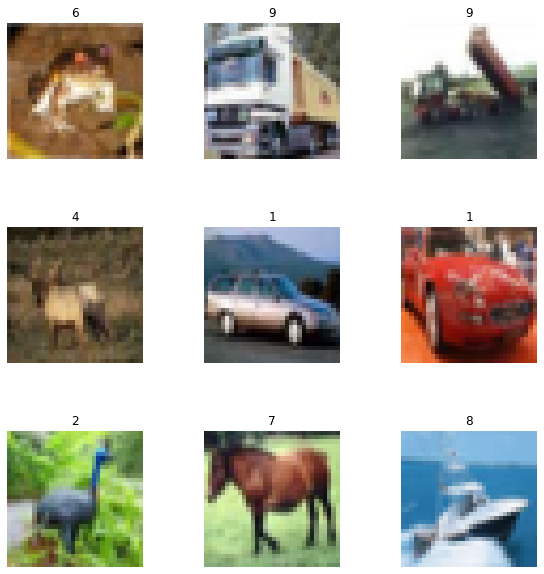

In [3]:
f, axes = plt.subplots(3, 3, figsize=(10,10))
axs = axes.ravel()

#This block takes in a row of CIFAR dataset and creates and saves an image of it for 9 rows
for i in range(9):
    example = X[i]
    R = example[0:1024].reshape(32,32)/255.0
    G = example[1024:2048].reshape(32,32)/255.0
    B = example[2048:].reshape(32,32)/255.0

    img = np.dstack((R,G,B))
    axs[i].imshow(img, interpolation='nearest')
    axs[i].set_title(y[i])
    axs[i].axis('off')

# show the figure
plt.subplots_adjust(hspace = 0.5)
plt.show()

def display(X, index):
    example = X[i]
    R = example[0:1024].reshape(32,32)/255.0
    G = example[1024:2048].reshape(32,32)/255.0
    B = example[2048:].reshape(32,32)/255.0

    img = np.dstack((R,G,B))
    plt.imshow(img, interpolation='nearest')
    plt.title(y[i])
    plt.axis('off')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(multi_class='multinomial')

param_grid = [{'penalty': ['l1'], 'solver':['saga'], 'C': [0.25, 0.5, 0.75]},
              {'penalty': ['l2'], 'solver':['lbfgs'], 'C': [0.25, 0.5, 0.75]}
             ]

log_reg_grid = GridSearchCV(log_reg, param_grid, cv=4, verbose=2)
log_reg_grid.fit(X_train, y_train)

log_reg_grid.best_params_

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] C=0.25, penalty=l1, solver=saga .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.3min remaining:    0.0s


[CV] .................. C=0.25, penalty=l1, solver=saga, total=11.3min
[CV] C=0.25, penalty=l1, solver=saga .................................


In [ ]:
from sklearn.model_selection import cross_val_score

def display_scores(model, X, y, cv=4):
    scores = cross_val_score(model, X, y, n_jobs=-1, scoring='accuracy', cv=cv)
    print(str(model.__class__.__name__) + '; mean: {:.4f} w std ({:.4f})'.format(scores.mean(), scores.std()))
    return scores

# cross_val_score(log_reg_grid.best_estimator_, X_train, y_train, n_jobs=-1, cv=5)
display_scores(log_reg_grid, X_train, y_train)

from sklearn.metrics import log_loss

#train_error
train_preds = log_reg_grid.best_estimator_.predict_proba(X_train)
loss = log_loss(y_train, train_preds)
print('train error: ', loss)

#test_error
test_preds = log_reg_grid.best_estimator_.predict_proba(X_test)
loss = log_loss(y_test, test_preds)
print('test error: ', loss)

# Problem 2

### Multi-class Logistic Regression { Visualizing the Solution

You will repeat
the previous problem but for the MNIST dataset which you will find here: https://www.openml.org/d/554. MNIST is a dataset of handwritten digits, and is considered one of the easiest image recognition problems in computer vision. We will see here how well logistic regression does, as you did above on the CIFAR-10 subset. In addition, we will see that we can visualize the solution, and that in connection to this, sparsity can be useful.

- Use the fetch openml command from sklearn.datasets to import the MNIST data set,
- Choose a reasonable train-test split, and again run multi-class logistic regression on these using the cross entropy loss, as you did above. Try to optimize the hyperparameters.
- Report your training and test loss from above.
- Choose an $l_1$ regularizer (penalty), and see if you can get a sparse solution with almost as good accuracy.
- Note that in Logistic Regression, the coefficients returned (i.e., the $\beta$'s) are the same dimension as the data. Therefore we can pretend that the coefficients of the solution are an image of the same dimension, and plot it. Do this for the 10 sets of coefficients that correspond to the 10 classes. You should observe that, at least for the sparse solutions, these "kind of" look like the digits they are classifying.

In [4]:
print("Downloading the MNIST dataset.")
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
print("The MNIST data has been downloaded successfully.")

The MNIST data has been downloaded successfully.


In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
plot_digit(X[0])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(multi_class='multinomial')

param_grid = [{'penalty': ['l1'], 'solver':['saga'], 'C': [0.25, 0.5, 0.75]},
              {'penalty': ['l2'], 'solver':['lbfgs'], 'C': [0.25, 0.5, 0.75]}
             ]
lr_gridsearch = GridSearchCV(log_reg, param_grid, cv=4, n_jobs=-1, verbose=2)
lr_gridsearch.fit(X_train, y_train)

lr_gridsearch.best_params_

for mean_score, params in zip(lr_gridsearch.cv_results_["mean_test_score"], lr_gridsearch.cv_results_["params"]):
    print(mean_score, params)

In [ ]:
display_scores(lr_gridsearch.best_estimator_, X_train, y_train)

from sklearn.metrics import log_loss

#train_error
train_preds = lr_gridsearch.best_estimator_.predict_proba(X_train)
loss = log_loss(y_train, train_preds)
print('train error: ', loss)

#test_error
test_preds = lr_gridsearch.best_estimator_.predict_proba(X_test)
loss = log_loss(y_test, test_preds)
print('test error: ', loss)

In [ ]:
lr_gridsearch.best_estimator_.coef_.shape
coefs = lr_gridsearch.best_estimator_.coef_

f, axs = plt.subplots(5, 2, figsize=(10,10))
axs = axs.ravel()

for j in range(coefs.shape[0]):
    cur_coef = coefs[j, :]
    reshaped = cur_coef.reshape(28,28)
    axs[j].imshow(reshaped, cmap=mpl.cm.binary, interpolation='nearest')
    axs[j].axis('off')
plt.show()

# Problem 3

### Revisiting Logistic Regression and MNIST

Here we throw the kitchen sink of classical ML (i.e. pre-deep learning) on MNIST.
- Use Random Forests to try to get the best possible test accuracy on MNIST. Use Cross Validation to find the best settings. How well can you do? You should use the accuracy metric to compare to logistic regression. What are the hyperparameters of your best model?
- Use Gradient Boosting to do the same. Try your best to tune your hyper parameters. What are the hyperparameters of your best model?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'n_estimators': [100, 500],
        'max_depth': [4, 8],
#         'bootstrap': [False, True],
        'min_samples_leaf': [5, 10, 20],
        'min_samples_split' : [5, 10, 20] 
    }


rf_gridsearch = RandomizedSearchCV(rf_clf, param_grid, n_iter=100, cv=4, random_state=42,
                       scoring='accuracy', n_jobs=-1, verbose=2)

rf_gridsearch.fit(X_train, y_train)

print('best hyper params: ', rf_gridsearch.best_params_)

display_scores(rf_gridsearch.best_estimator_, X_train, y_train)


from sklearn.metrics import accuracy_score

y_pred = rf_gridsearch.predict(X_test)
y_pred_log = lr_gridsearch.predict(X_test)
print('random forest classifier accuracy: {}, log reg classifier accuracy: {}'.format(accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_log)))

In [ ]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'subsample' : [0.5, 0.8],
        'n_estimators': [100, 500],
        'max_depth': [4, 8],
        'min_samples_leaf': [5, 10, 20],
        'min_samples_split' : [5, 10, 20]
}

gb_gridsearch = RandomizedSearchCV(gb_clf, param_grid, cv=4, n_iter=100, random_state=42, scoring='accuracy', n_jobs=-1, verbose=2)

gb_gridsearch.fit(X_train, y_train)

print('best hyper params: ', gb_gridsearch.best_params_)

y_pred_gb = gb_gridsearch.predict(X_test)
print('gradient boosting classifier accuracy: {}'.format(accuracy_score(y_test, y_pred_gb)))

# Problem 4

### Revisiting Logistic Regression and CIFAR-10

As before, we'll throw the kitchen sink of classical ML (i.e. pre-deep learning) on CIFAR-10. Keep in mind that CIFAR-10 is a few times larger.
- What is the best accuracy you can get on the test data, by tuning Random Forests? What are the hyperparameters of your best model?
- What is the best accuracy you can get on the test data, by tuning any model including Gradient boosting? What are the hyperparameters of your best model?

In [ ]:
X_cifar, y_cifar = cifar_10_small['data'], cifar_10_small['target']

X_train, X_test, y_train, y_test = train_test_split(X_cifar, y_cifar, test_size=0.25, random_state=42)

#Random Forest

rf_clf = RandomForestClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'n_estimators': [100, 500],
        'max_depth': [4, 8],
#         'bootstrap': [False, True],
        'min_samples_leaf': [5, 10, 20],
        'min_samples_split' : [5, 10, 20] 
    }


rf_gridsearch = RandomizedSearchCV(rf_clf, param_grid, n_iter=100, cv=4, random_state=42,
                       scoring='accuracy', n_jobs=-1, verbose=2)

rf_gridsearch.fit(X_train, y_train)
print('best params: ', rf_gridsearch.best_params_)

y_pred = rf_gridsearch.predict(X_test)
print('random forest classifier accuracy: {}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
# Gradient Boosting

gb_clf = GradientBoostingClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'subsample' : [0.8],
        'n_estimators': [500],
        'max_depth': [4, 8],
        'min_samples_leaf': [5, 10, 20],
        'min_samples_split' : [5, 10, 20]
}

gb_gridsearch = RandomizedSearchCV(gb_clf, param_grid, cv=3, n_iter=100, random_state=42, scoring='accuracy', n_jobs=-1, verbose=2)

gb_gridsearch.fit(X_train, y_train)

print('best params: ', gb_gridsearch.best_params_)

y_pred = gb_gridsearch.predict(X_test)
print('gradient boosting classifier accuracy: {}'.format(accuracy_score(y_test, y_pred)))

# Problem 5

### Getting Started with Pytorch

- Install Pytorch.
- Work through this tutorial to familiarize yourself with Pytorch basics: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py
- Work through this tutorial on MNIST starting from a Pytorch logistic regression and building to a CNN using torch.nn. Use a GPU (e.g. on Colab, through Google Cloud credits, Paperspace, or any other way). https://pytorch.org/tutorials/beginner/nn_tutorial.html
- Design the best CNN you can to get the best accuracy on MNIST.

In [3]:
from __future__ import print_function
import torch

from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)
        
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((X_train, y_train), (X_test, y_test), _) = pickle.load(f, encoding="latin-1")
        
X_train.min(), X_train.max()

import torch

X_train = (X_train - 0.5) / 0.5
X_test = (X_test - 0.5) / 0.5

# y_train = y_train.astype(np.float32)
# y_test = y_test.astype(np.float32)

X_train, y_train, X_test, y_test = map(
    torch.tensor, (X_train, y_train, X_test, y_test)
)

# X_train = X_train.type(torch.long)
# X_test = X_test.type(torch.long)
# y_train = y_train.type(torch.long)
# y_test = y_test.type(torch.long)


bs = 64

from torch.utils.data import TensorDataset

train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)



from torch.utils.data import DataLoader

def get_data(train_ds, test_ds, bs=64):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(test_ds, batch_size=bs * 2),
    )



train_dl, test_dl = get_data(train_ds, test_ds)



import torch.nn.functional as F
from torch import nn

loss_func = F.cross_entropy
# loss_func = nn.CrossEntropyLoss()

def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)



def preprocess(x, y):
    return x.view(-1, 1, 28, 28), y


class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

train_dl = WrappedDataLoader(train_dl, preprocess)
test_dl = WrappedDataLoader(test_dl, preprocess)

from IPython.core.debugger import set_trace

import numpy as np


def fit(epochs, model, loss_func, opt, train_dl, valid_dl, c=3, p=32):
    epoch_train_loss = []
    epoch_train_acc = []
    epoch_test_loss = []
    epoch_test_acc = []
    

    for epoch in range(epochs):
        model.train()
        train_losses = []
        train_nums = []
        train_accs = []
        for xb, yb in train_dl:
            losses, nums = loss_batch(model, loss_func, xb, yb, opt)
            train_accs.append(accuracy(model(xb), yb))
            train_losses.append(losses)
            train_nums.append(nums)
        train_loss = np.sum(np.multiply(np.array(train_losses), np.array(train_nums))) / np.sum(train_nums)
        epoch_train_loss.append(train_loss)
        train_acc = np.sum(np.multiply(np.array(train_accs), np.array(train_nums))) / np.sum(train_nums)
        epoch_train_acc.append(train_acc)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in test_dl]
            )
            accuracies = [accuracy(model(xb), yb) for xb, yb in test_dl]
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        epoch_test_loss.append(val_loss)
        val_acc = np.sum(np.multiply(accuracies, nums)) / np.sum(nums)
        epoch_test_acc.append(val_acc)
        
        print('epoch #: {}, train_loss: {}, val_loss: {}'.format(epoch, train_loss, val_loss))
        print('train_accuracy: {}, val_accuracy: {}'.format(train_acc, val_acc))
        print('=======================================')

    return epoch_train_loss, epoch_test_loss



class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)



model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    # Lambda(lambda x: x.view(x.size(0), -1)),
    nn.Flatten(),
)

from torch import optim

lr = 0.5  # learning rate
epochs = 15
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, test_dl, c=1, p=28)

# Problem 6

### CNNs for CIFAR-10

- Build a CNN and optimize the accuracy for CIFAR-10. Try different number of layers and different architectures (depth and convolutional filter hyperparameters).
- Is momentum and learning rate having a significant effect? Track the train and test loss across training epochs and plot them for different learning rates and momentum values.
- Is the depth of the CNN having a significant effect on performance? Describe the hyperparameters of the best model you could train.

In [ ]:
from sklearn.datasets import fetch_openml
cifar_10_small = fetch_openml('CIFAR_10_Small', version=1)
cifar_10_small.keys()

X, y = cifar_10_small['data'], cifar_10_small['target']

X.shape



from sklearn.model_selection import train_test_split
X_train_cifar, X_test_cifar, y_train_cifar, y_test_cifar = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_cifar /= 255.
X_test_cifar /= 255.
X_train_cifar

import torch

X_train_cifar = (X_train_cifar - 0.5) / 0.5
X_test_cifar = (X_test_cifar - 0.5) / 0.5

y_train_cifar = y_train_cifar.astype(np.float32)
y_test_cifar = y_test_cifar.astype(np.float32)

X_train_cifar, y_train_cifar, X_test_cifar, y_test_cifar = map(
    torch.tensor, (X_train_cifar, y_train_cifar, X_test_cifar, y_test_cifar)
)


X_train_cifar = X_train_cifar.type(torch.float32)
X_test_cifar = X_test_cifar.type(torch.float32)
y_train_cifar = y_train_cifar.type(torch.float32)
y_test_cifar = y_test_cifar.type(torch.float32)

bs = 64

X_train_cifar



train_ds = TensorDataset(X_train_cifar, y_train_cifar)
test_ds = TensorDataset(X_test_cifar, y_test_cifar)

train_dl, test_dl = get_data(train_ds, test_ds)

def preprocess_cifar(x, y):
    return x.view(-1, 3, 32, 32), y


train_dl = WrappedDataLoader(train_dl, preprocess_cifar)
test_dl = WrappedDataLoader(test_dl, preprocess_cifar)

def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb.type(torch.long))

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)



model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    # Lambda(lambda x: x.view(x.size(0), -1)),
    nn.Flatten(),
)

import torch.nn as nn
import torch.nn.functional as F


# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
#         self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1)
#         self.pool = nn.MaxPool2d(2)
#         self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=1, padding=1)
#         self.avgpool = nn.AdaptiveAvgPool2d(1)
#         self.flatten = nn.Flatten()

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.avgpool(F.relu(self.conv3(x)))
#         x = self.flatten(x)
#         return x

# model = Net()

from torch import optim

momentum = 0.9
lr = 0.5  # learning rate
epochs = 20
opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_losses, test_losses = fit(epochs, model, loss_func, opt, train_dl, test_dl)

In [ ]:
plt.plot(train_losses, range(len(train_losses)), 'b-', label='train' )
plt.plot(test_losses, range(len(test_losses)), 'g--', label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Model 1: train_vs_test')
plt.legend()
plt.show()

In [ ]:
model2 = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(32, 10, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    # Lambda(lambda x: x.view(x.size(0), -1)),
    nn.Flatten(),
    nn.Linear(10*16*16, 32),
    nn.ReLU(),
    nn.Linear(32, 10),
    nn.Softmax(),
)

from torch import optim

momentum = 0.9
lr = 0.5  # learning rate
epochs = 20
opt = optim.SGD(model2.parameters(), lr=lr, momentum=momentum)

train_losses, test_losses = fit(epochs, model2, loss_func, opt, train_dl, test_dl)

In [ ]:
plt.plot(train_losses, range(len(train_losses)), 'b-', label='train' )
plt.plot(test_losses, range(len(test_losses)), 'g--', label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Model 2: train_vs_test')
plt.legend()
plt.show()

In [ ]:
for layer in model.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()


momentum = 0.9
lr = 0.05  # learning rate
epochs = 10
opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_losses, test_losses = fit(epochs, model, loss_func, opt, train_dl, test_dl)

In [ ]:
plt.plot(train_losses, range(len(train_losses)), 'b-', label='train' )
plt.plot(test_losses, range(len(test_losses)), 'g--', label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Model: train_vs_test, lr=0.05')
plt.legend()
plt.show()

In [ ]:
for layer in model.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

momentum = 0.9
lr = 0.001  # learning rate
epochs = 20
opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_losses, test_losses = fit(epochs, model, loss_func, opt, train_dl, test_dl)

plt.plot(train_losses, range(len(train_losses)), 'b-', label='train' )
plt.plot(test_losses, range(len(test_losses)), 'g--', label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Model : train_vs_test, lr=0.001')
plt.legend()
plt.show()

In [ ]:
for layer in model.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

momentum = 0.5
lr = 0.05  # learning rate
epochs = 20
opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_losses, test_losses = fit(epochs, model, loss_func, opt, train_dl, test_dl)

plt.plot(train_losses, range(len(train_losses)), 'b-', label='train' )
plt.plot(test_losses, range(len(test_losses)), 'g--', label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Model : train_vs_test, lr=0.001')
plt.legend()
plt.show()